In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.manual_seed(42)
import torchvision

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import models
import unet

In [27]:
root = "/cluster/tufts/hugheslab/eharve06/MNIST"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=32),
])
train_dataset = torchvision.datasets.MNIST(root=root, train=True, transform=transform, download=True)

tensor(0.9999)
tensor(0.6590)
tensor(0.1951)
tensor(0.0259)
tensor(0.0015)
tensor(4.0358e-05)


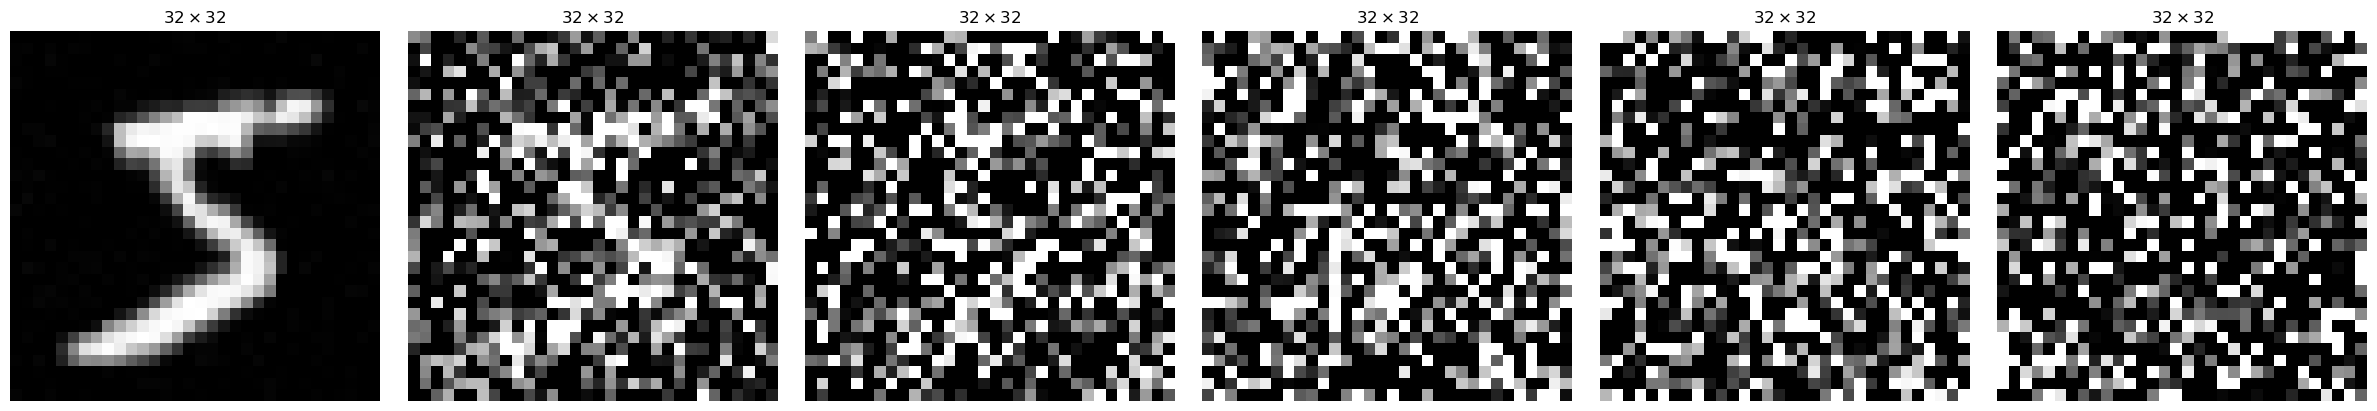

In [75]:
x_t = train_dataset[0][0]

T = 1_000
betas = torch.linspace(1e-4, 0.02, T)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)

ncols, nrows = 6, 1

fig, axs = plt.subplots(figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

t = 0
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[0].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[0].axis("off")
axs[0].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 199
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[1].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[1].axis("off")
axs[1].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 399
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[2].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[2].axis("off")
axs[2].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 599
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[3].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[3].axis("off")
axs[3].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 799
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[4].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[4].axis("off")
axs[4].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 999
alpha_bar_t = alphas_cumprod[t]
print(alpha_bar_t)

eps = torch.randn_like(x_t)
x_t = torch.sqrt(alpha_bar_t) * x_t + \
      torch.sqrt(1 - alpha_bar_t) * eps

axs[5].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[5].axis("off")
axs[5].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

fig.tight_layout()
fig.savefig("forward_and_backward_process.pdf", bbox_inches="tight")
plt.show()

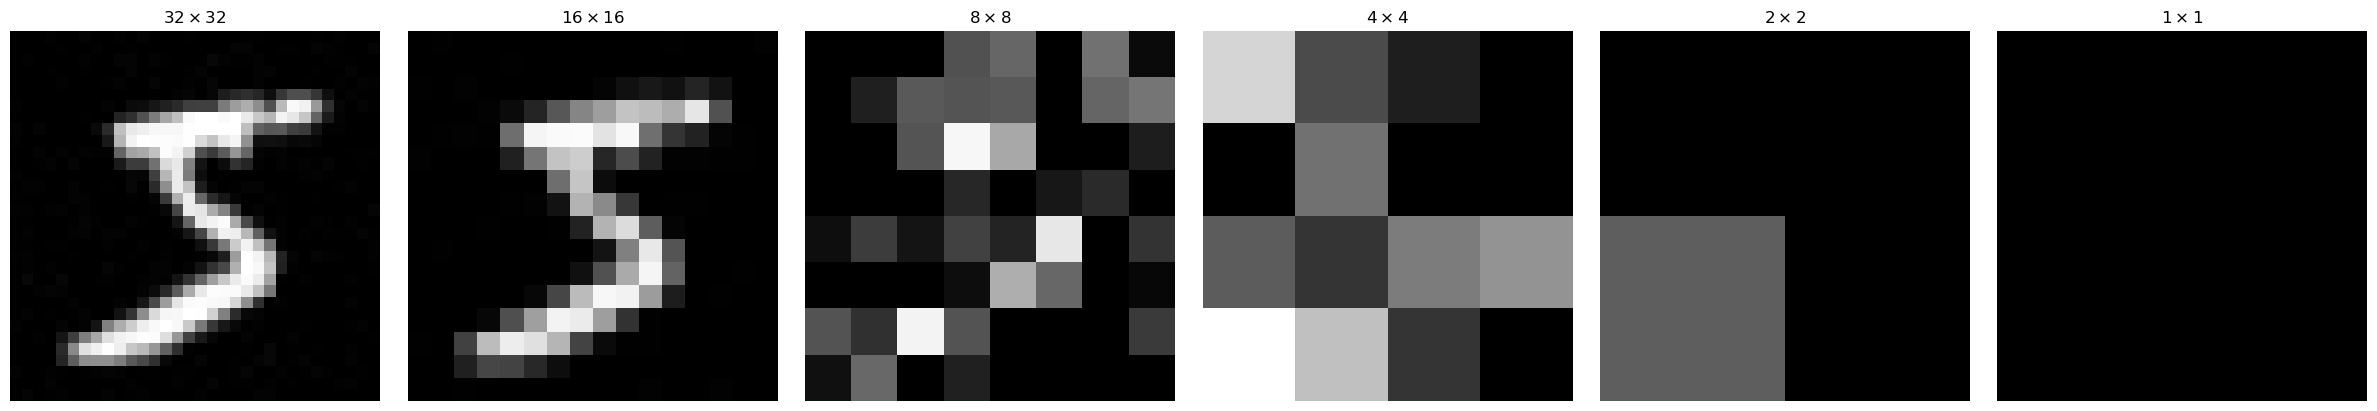

In [66]:
x_0 = train_dataset[0][0]

T = 5
betas = torch.linspace(1e-4, 1.0, T)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)

ncols, nrows = 6, 1

fig, axs = plt.subplots(figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

t = 0
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
      torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[0].imshow(x_t_minus_1.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[0].axis("off")
axs[0].set_title(rf"${x_t_minus_1.shape[1]}\times{x_t_minus_1.shape[2]}$")

t = 0
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[1].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[1].axis("off")
axs[1].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 1
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[2].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[2].axis("off")
axs[2].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 2
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[3].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[3].axis("off")
axs[3].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 3
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[4].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[4].axis("off")
axs[4].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

t = 4
alpha_bar_t = alphas_cumprod[t]

x_t_minus_1 = torch.nn.functional.avg_pool2d(x_0, kernel_size=2**t, stride=2**t, count_include_pad=False)
eps = torch.randn_like(x_t_minus_1)
x_t_minus_1 = torch.sqrt(alpha_bar_t) * x_t_minus_1 + \
              torch.sqrt(1 - alpha_bar_t) * eps
x_t = torch.nn.functional.avg_pool2d(x_t_minus_1, kernel_size=2, stride=2, count_include_pad=False)

axs[5].imshow(x_t.permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[5].axis("off")
axs[5].set_title(rf"${x_t.shape[1]}\times{x_t.shape[2]}$")

fig.tight_layout()
fig.savefig("forward_and_backward_process.pdf", bbox_inches="tight")
plt.show()

In [31]:
eps_model = unet.EnhanceUNet(image_channels=1)
model = models.DenoisingDiffusionProbabilisticModel(eps_model=eps_model, T=5)
checkpoint = torch.load("/cluster/tufts/hugheslab/eharve06/CS150-FinalProject/experiments/MNIST_new_betas/batch_size=32_epochs=1000_lr=0.001_random_state=42.pth", map_location=torch.device("cpu"), weights_only=False)
model.load_state_dict(checkpoint)

<All keys matched successfully>

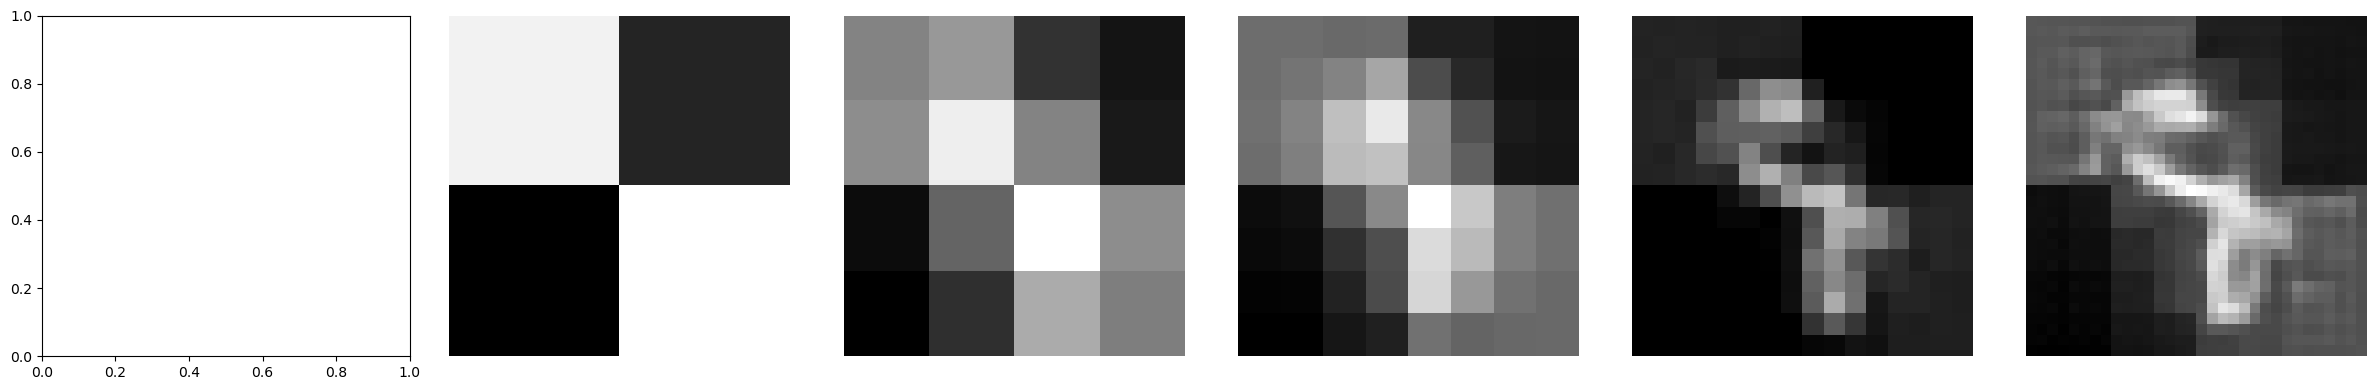

In [52]:
model.eval()

x_t = 0.2 + 0.2 * torch.randn(size=(1, 1, 2, 2))
norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

ncols, nrows = 6, 1

fig, axs = plt.subplots(figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

#axs[0].imshow(x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
#axs[0].axis("off")

#with torch.no_grad():
#    t = torch.tensor([4.0])
#    x_t = model.eps_model(x_t, t)
#    norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[1].imshow(norm_x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[1].axis("off")

with torch.no_grad():
    t = torch.tensor([3.0])
    x_t = model.eps_model(x_t, t)
    norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[2].imshow(norm_x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[2].axis("off")

with torch.no_grad():
    t = torch.tensor([2.0])
    x_t = model.eps_model(x_t, t)
    norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[3].imshow(norm_x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[3].axis("off")

with torch.no_grad():
    t = torch.tensor([1.0])
    x_t = model.eps_model(x_t, t)
    norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[4].imshow(x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[4].axis("off")

with torch.no_grad():
    t = torch.tensor([0.0])
    x_t = model.eps_model(x_t, t)
    norm_x_t = (x_t - x_t.min()) / (x_t.max() - x_t.min())

axs[5].imshow(norm_x_t[0].permute(1, 2, 0), cmap="gray", vmin=0.0, vmax=1.0)
axs[5].axis("off")

fig.tight_layout()

plt.show()
